<a href="https://colab.research.google.com/github/AynaAraujo/Recomendador-de-Playlist/blob/main/Recomendador_de_Playlist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Info sobre os dados

**Acousticness/Acústica:** variável numérica; medida de confiança de 0,0 a 1,0 se a faixa é acústica. O 1.0 representa alta confiança de que a faixa é acústica.

**Danceability/Dançabilidade:** variável numérica; a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos e 1,0 é o mais dançável.

**Duration_ms:** variável numérica; a duração da trilha em milissegundos.

**Duration_min:** variável numérica; a duração da faixa em minutos.

**Energy/Energia:** variável numérica; energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

**Explicit/Explícito:** variável categórica; se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

**Id:** o ID do Spotify para a faixa.

**Instrumentalness/Instrumentalidade:** variável numérica; prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

Key/Chave: variável numérica; a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo, 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

Liveness/Ao vivo: variável numérica; detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

Loudness/Volume em dB: variável numérica; volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som em relação à sua amplitude (“altura”), por medir a relação entre os picos e depressões de uma onda sonora. Os valores típicos variam entre -60 e 0 db.

Mode/Modo: variável numérica; o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

Popularity/Popularidade: variável numérica; a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

Speechiness/Fala: variável numérica; detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música estilo rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

Tempo: variável numérica; tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

Valence/Valência: variável numérica; medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (como, triste, deprimida, irritada).

Year/Ano: ano em que a música foi lançada.

#Instalando o PySpark

In [1]:
!pip install pyspark

##Criando SparkSession

In [2]:
from pyspark.sql import SparkSession

In [3]:
sessao_spark = SparkSession\
                  .builder\
                  .appName("Recomendador PySpark")\
                  .getOrCreate()

sessao_spark

#AULA 2 - Leitura e Análise dos Dados

##2.1 Leitura dos Dados

In [4]:
from pyspark import SparkFiles

In [5]:
#url do arquivo no github
url_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas.csv?raw=true'

In [6]:
#Interagindo com o ambiente spark vamos adicionar um arquivo a ele
sessao_spark.sparkContext.addFile(url_dados)

In [7]:
#Ver onde o file foi adicionado dentro do ambiente spark
path_dados_file = 'file://' + SparkFiles.get('dados_musicas.csv')

In [8]:
dados = sessao_spark.read.csv(
          path_dados_file,
          header = True,
          sep=';',
          inferSchema= True
)

In [9]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [10]:
dados.printSchema()

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



In [11]:
dados.count()

20311

In [12]:
len(dados.columns)

19

In [13]:
from pyspark.sql import functions as f

In [14]:
#Verificando valores nulos
dados\
    .select([f.count(f.when(f.isnull(c),1)).alias(c) for c in dados.columns])\
    .show()

+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+



In [15]:
print(sorted(dados\
    .select('year')\
    .distinct()\
    .collect()))

[Row(year=2000), Row(year=2001), Row(year=2002), Row(year=2003), Row(year=2004), Row(year=2005), Row(year=2006), Row(year=2007), Row(year=2008), Row(year=2009), Row(year=2010), Row(year=2011), Row(year=2012), Row(year=2013), Row(year=2014), Row(year=2015), Row(year=2016), Row(year=2017), Row(year=2018), Row(year=2019), Row(year=2020)]


##2.2 Análise dos Dados

In [16]:
url_anos_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_ano.csv?raw=true'

In [17]:
sessao_spark.sparkContext.addFile(url_anos_dados)

In [18]:
path_dados_file = 'file://' + SparkFiles.get('dados_musicas_ano.csv')

In [19]:
dados_anos = sessao_spark.read.csv(
    path_dados_file,
    header = True,
    inferSchema =True
)

In [20]:
dados_anos.show()

+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|       danceability|       duration_ms|             energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005| 0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|            0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748| 0.4820422535211267|165469.74647887325

In [21]:
dados_anos = dados_anos\
    .filter('year >= 2000')

dados_anos.show()

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|           valence|        popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853| -8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991|  46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.626985522

In [22]:
dados_anos.count()

21

In [23]:
len(dados_anos.columns)

14

**OBS:** Só podemos utilizar o *ToPandas* em situações com poucos dados para não sobrecarregar o nó

In [24]:
import plotly.express as px

In [25]:
fig = px.line(dados_anos.toPandas(), x ='year', y ='loudness',markers= True,
              title='Variação do loudness conforme os anos')
fig.show()

In [26]:
import plotly.graph_objects as go

In [27]:
temp = dados_anos.toPandas()

In [28]:
fig = go.Figure()

In [29]:
fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'], name='Acousticness'))

fig.show()

In [30]:
fig.add_trace(go.Scatter(x=temp['year'], y=temp['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['speechiness'],
                    name='Speechiness'))

fig.show()

##2.3 Matriz de Correlação

In [31]:
fig = px.imshow(dados_anos.drop('mode').toPandas().corr(), text_auto=True)
fig.show()

#AULA 3 - Clusterização por gênero

##3.1 StandardScaler

Técnica para igualar as escalas dos nossos dados

In [32]:
url_dados_generos = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_genero.csv?raw=true'

In [33]:
sessao_spark.sparkContext.addFile(url_dados_generos)
path_dados_file = "file://" + SparkFiles.get("dados_musicas_genero.csv")

dados_generos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema= True)

In [34]:
dados_generos.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [35]:
dados_generos.count()

2973

In [36]:
dados_generos\
    .select('genres').distinct().count()

2973

In [37]:
len(dados_generos.columns)

14

In [38]:
#Vetorizando os dados
from pyspark.ml.feature import VectorAssembler

In [39]:
dados_generos.columns

['mode',
 'genres',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [40]:
X = dados_generos.columns
X.remove('genres')

In [41]:
X

['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [42]:
dados_generos_vector = VectorAssembler(inputCols=X,outputCol='features').transform(dados_generos)\
                        .select(['features','genres'])

In [43]:
dados_generos_vector.show(truncate =False,n=5)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|features                                                                                                                                                                                                                   |genres                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|[1.0,0.9793333333333332,0.16288333333333335,160297.66666666663,0.07131666666666665,0.60683367,0.3616,-31.514333333333337,0.04056666666666667,75.3365,0.10378333333333334,27.83333333333333,6.0]                            |21st century classical|
|[1.0,0.49478,0.2993

In [44]:
from pyspark.ml.feature import StandardScaler

In [45]:
scaler = StandardScaler(inputCol='features',outputCol='scaled_features')
scaler_model = scaler.fit(dados_generos_vector)
dados_generos_scaler = scaler_model.transform(dados_generos_vector)

In [46]:
dados_generos_scaler.show(truncate = False                         )

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                                                     |genres                |scaled_features                                                                                                                                                                                                                                         |
+-------

##3.2 PCA - Principal Component Analysis

A ideia do PCA é reunir as diversas features das 14 colunas e reduzi-las em apenas duas, permitindo, desta maneira, a construção de análises gráficas e um estudo mais apurado das informações.

PCA é um método clássico que podemos usar para reduzir dados de alta dimensionalidade para um espaço de baixa dimensão.

In [47]:
from pyspark.ml.feature import PCA

In [48]:
pca = PCA(k=2,inputCol='scaled_features',outputCol='pca_features')

In [49]:
model_pca = pca.fit(dados_generos_scaler)

In [50]:
dados_generos_pca = model_pca.transform(dados_generos_scaler)

In [51]:
dados_generos_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[-2.5070953668885663,-0.43816913737698293]|
|[0.596967905663348,-4.981612052751353]    |
|[4.158460276223559,0.83665250810799]      |
|[2.3873448785122156,0.4877989015663361]   |
|[2.650121837167907,0.575681976882043]     |
|[1.4965091203367622,-1.8644183183717828]  |
|[3.9235207721573224,-0.28518350023528705] |
|[4.611011109831113,0.6783790472312338]    |
|[2.8376900630842288,0.57129937165805]     |
|[2.706690139892782,1.2593788079708255]    |
|[4.698331383924286,-1.2765569680619455]   |
|[3.375987496679866,-0.7560741064307498]   |
|[5.608998877066019,-1.042731164439324]    |
|[-0.2954946352117699,0.2763864586236268]  |
|[2.572559106287041,1.3169815431109746]    |
|[3.400822802049343,-0.5073029625781936]   |
|[4.366720316263417,0.33648270597710517]   |
|[2.7254698167723985,-0.5058604987046403]  |
|[4.958112358381603,-1.2627579957290722]   |
|[3.693495

###3.2.1 Criando a Pipeline

In [52]:
from pyspark.ml import Pipeline

In [53]:
pca_pipeline = Pipeline(
    stages=[
        VectorAssembler(inputCols=X,outputCol='features'),
        StandardScaler(inputCol='features',outputCol='scaled_features'),
        PCA(k=2,inputCol='scaled_features',outputCol='pca_features')
    ]
)

In [54]:
pca_pipeline_model = pca_pipeline.fit(dados_generos)

In [55]:
dados_generos_pca = pca_pipeline_model.transform(dados_generos)

In [56]:
dados_generos_pca.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|            features|     scaled_features|        pca_features|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|   1|21st century clas...| 0.9793333333333332|0.162883333

In [57]:
dados_generos_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[-2.5070953668885663,-0.43816913737698293]|
|[0.596967905663348,-4.981612052751353]    |
|[4.158460276223559,0.83665250810799]      |
|[2.3873448785122156,0.4877989015663361]   |
|[2.650121837167907,0.575681976882043]     |
|[1.4965091203367622,-1.8644183183717828]  |
|[3.9235207721573224,-0.28518350023528705] |
|[4.611011109831113,0.6783790472312338]    |
|[2.8376900630842288,0.57129937165805]     |
|[2.706690139892782,1.2593788079708255]    |
|[4.698331383924286,-1.2765569680619455]   |
|[3.375987496679866,-0.7560741064307498]   |
|[5.608998877066019,-1.042731164439324]    |
|[-0.2954946352117699,0.2763864586236268]  |
|[2.572559106287041,1.3169815431109746]    |
|[3.400822802049343,-0.5073029625781936]   |
|[4.366720316263417,0.33648270597710517]   |
|[2.7254698167723985,-0.5058604987046403]  |
|[4.958112358381603,-1.2627579957290722]   |
|[3.693495

##3.3 K-Means

 K-means tenta organizar os dados em um número k de clusters que definimos inicialmente. A partir disso, ele identifica os pontos de dados semelhantes e vai criando agrupamentos, tentando distanciar cada cluster o máximo possível.

In [58]:
SEED = 1224

In [59]:
from pyspark.ml.clustering import KMeans

In [60]:
kmeans = KMeans(featuresCol= 'pca_features',predictionCol='cluster_pca').setK(5).setSeed(SEED)

In [61]:
model_kmeans = kmeans.fit(dados_generos_pca)

In [62]:
predictions_kmeans= model_kmeans.transform(dados_generos_pca)

In [63]:
predictions_kmeans\
          .select('pca_features', 'cluster_pca')\
          .show(truncate=False)

+------------------------------------------+-----------+
|pca_features                              |cluster_pca|
+------------------------------------------+-----------+
|[-2.5070953668885663,-0.43816913737698293]|2          |
|[0.596967905663348,-4.981612052751353]    |2          |
|[4.158460276223559,0.83665250810799]      |4          |
|[2.3873448785122156,0.4877989015663361]   |0          |
|[2.650121837167907,0.575681976882043]     |0          |
|[1.4965091203367622,-1.8644183183717828]  |2          |
|[3.9235207721573224,-0.28518350023528705] |4          |
|[4.611011109831113,0.6783790472312338]    |1          |
|[2.8376900630842288,0.57129937165805]     |4          |
|[2.706690139892782,1.2593788079708255]    |0          |
|[4.698331383924286,-1.2765569680619455]   |3          |
|[3.375987496679866,-0.7560741064307498]   |4          |
|[5.608998877066019,-1.042731164439324]    |1          |
|[-0.2954946352117699,0.2763864586236268]  |2          |
|[2.572559106287041,1.316981543

##3.4 Plotando o Clustering

In [64]:
from pyspark.ml.functions import vector_to_array

In [65]:
pca_features_xy = predictions_kmeans\
                      .withColumn('x',vector_to_array('pca_features')[0])\
                      .withColumn('y',vector_to_array('pca_features')[1])\
                      .select(['x','y','cluster_pca','genres'])

In [66]:
pca_features_xy.show()

+-------------------+--------------------+-----------+--------------------+
|                  x|                   y|cluster_pca|              genres|
+-------------------+--------------------+-----------+--------------------+
|-2.5070953668885663|-0.43816913737698293|          2|21st century clas...|
|  0.596967905663348|  -4.981612052751353|          2|               432hz|
|  4.158460276223559|    0.83665250810799|          4|               8-bit|
| 2.3873448785122156|  0.4877989015663361|          0|                  []|
|  2.650121837167907|   0.575681976882043|          0|          a cappella|
| 1.4965091203367622| -1.8644183183717828|          2|            abstract|
| 3.9235207721573224|-0.28518350023528705|          4|      abstract beats|
|  4.611011109831113|  0.6783790472312338|          1|    abstract hip hop|
| 2.8376900630842288|    0.57129937165805|          4|           accordeon|
|  2.706690139892782|  1.2593788079708255|          0|           accordion|
|  4.6983313

In [67]:
fig = px.scatter(pca_features_xy.toPandas(),
                 x='x',
                 y='y',
                 color= 'cluster_pca',
                 hover_data=['x','y','genres'])#informações que aparecem ao por o mouse em cima da bolinha

fig.show()

os pontos estão muito juntos o que não é o ideal para tirarmos informações

In [68]:
pca_pipeline_model.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

nosso x está explicando 3 vars(0.29 +/- = 3) e o nosso y está representando 1(0,1)
logo no total temos 4 vars sendo representandos, então temos muita perca de info.

#AULA 4 - Clusterização por Música

##4.1 Redução de Dimensionalidade

In [69]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [70]:
#Removendo Colunas que não nos são interessantes
X = dados.columns
X.remove('artists')
X.remove('id')
X.remove('name')
X.remove('artists_song')
X

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [71]:
#vetorizando
dados_encoded_vector = VectorAssembler(inputCols = X,outputCol='features').transform(dados)

In [72]:
dados_encoded_vector.select('features').show(truncate =False,n=5)

+-------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------+
|[0.285,2000.0,0.00239,0.429,266773.0,0.6609999999999999,0.0,1.21E-4,11.0,0.234,-7.227,1.0,84.0,0.0281,173.372]           |
|[0.613,2000.0,0.143,0.843,270507.0,0.8059999999999999,1.0,0.0,4.0,0.0771,-5.9460000000000015,0.0,80.0,0.269,94.948]      |
|[0.4,2000.0,0.00958,0.556,216880.0,0.8640000000000001,0.0,0.0,3.0,0.209,-5.87,0.0,84.0,0.0584,105.143]                   |
|[0.5429999999999999,2000.0,0.00664,0.545,233933.0,0.865,0.0,1.1E-5,11.0,0.168,-5.7079999999999975,0.0,78.0,0.0286,99.009]|
|[0.76,2000.0,0.0302,0.949,284200.0,0.6609999999999999,1.0,0.0,5.0,0.0454,-4.244,0.0,80.0,0.0572,104.504]                 |
+-------

In [73]:
scaler = StandardScaler(inputCol='features',outputCol='features_scaled')

In [74]:
model_scaler = scaler.fit(dados_encoded_vector)
dados_musicas_scaler =  model_scaler.transform(dados_encoded_vector)

In [75]:
dados_musicas_scaler.select('features_scaled').show(truncate =False,n=5)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789E-4,3.0696424994844875,1.4832857988766257,-1.

Nosso objetivo é maximizar a recomendação, logo precisamos do max de infos para um número min de vars.

In [76]:
k = len(X)
k

15

In [77]:
pca =   PCA(k=k,inputCol='features_scaled',outputCol='pca_features')

In [78]:
model_pca = pca.fit(dados_musicas_scaler)
dados_musicais_scaler =  model_pca.transform(dados_musicas_scaler)

In [79]:
#Retorna um vector denso com a explicação de cada uma das componentes
model_pca.explainedVariance

DenseVector([0.213, 0.133, 0.0939, 0.0869, 0.0733, 0.0665, 0.0616, 0.0563, 0.0505, 0.0462, 0.0339, 0.0284, 0.0264, 0.0202, 0.0099])

In [80]:
sum(model_pca.explainedVariance) * 100

100.00000000000003

In [81]:
lista_valores = [sum(model_pca.explainedVariance[0:i+1]) for i in range(k) ]
lista_valores

[0.21297354127107349,
 0.3459774162295507,
 0.43989805678254446,
 0.5267820578269103,
 0.6001038103117929,
 0.666571951365239,
 0.7282174213581728,
 0.7845103843321023,
 0.8350002357002614,
 0.8812446547406769,
 0.9151737562703048,
 0.9435370133056039,
 0.9699018569070161,
 0.9900947792885582,
 1.0000000000000002]

Queremos encontrar o qtd ideal min de componetes que tenham info necessária.

In [82]:
import numpy as np

In [83]:
k = sum(np.array(lista_valores)<= 0.7)  #taxa min de explicação
k

6

In [84]:
pca =   PCA(k=k,inputCol='features_scaled',outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicais_pca_final =  model_pca.transform(dados_musicas_scaler)

In [85]:
dados_musicais_pca_final.select('pca_features').show(truncate = False,n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444]  |
|[-36.49885762774904,-167.85185045616547,-10.729023248907904,-135.90435265671286,13.38840189058717,-3.972980727830917] |
|[-35.46030091694054,-165.99633344577876,-11.361290348241944,-138.24276881246985,13.866654919305718,-4.342675920458773]|
|[-35.56301325520582,-165.59515096480598,-11.46022600703173,-137.52095740570027,15.568542803922659,-4.542073725584329] |
|[-36.54556974907565,-167.37512505802474,-11.881276527236897,-136.27798590243967,14.056847990344485,-3.583390145779214]|
+-------------------------------

In [86]:
sum(model_pca.explainedVariance)*100

66.6571951365239

##4.2 Criação dos Clusters

###4.2.1 Criando a Pipeline

In [87]:
pca_pipeline =Pipeline(stages=[
      VectorAssembler(inputCols = X,outputCol='features'),
      StandardScaler(inputCol='features',outputCol='features_scaled'),
      PCA(k=6,inputCol='features_scaled',outputCol='pca_features')
])

In [88]:
model_pca_pipeline = pca_pipeline.fit(dados)

In [89]:
projection = model_pca_pipeline.transform(dados)

In [90]:
projection.select('pca_features').show(truncate=False,n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444]  |
|[-36.49885762774904,-167.85185045616547,-10.729023248907904,-135.90435265671286,13.38840189058717,-3.972980727830917] |
|[-35.46030091694054,-165.99633344577876,-11.361290348241944,-138.24276881246985,13.866654919305718,-4.342675920458773]|
|[-35.56301325520582,-165.59515096480598,-11.46022600703173,-137.52095740570027,15.568542803922659,-4.542073725584329] |
|[-36.54556974907565,-167.37512505802474,-11.881276527236897,-136.27798590243967,14.056847990344485,-3.583390145779214]|
+-------------------------------

###4.2.2 Criando os Clusters com K-Means

In [91]:
kmeans = KMeans(k = 50, featuresCol= 'pca_features',predictionCol='cluster_pca',seed=SEED)

In [92]:
modelo_kmeans = kmeans.fit(projection)

In [93]:
projection_kmeans = modelo_kmeans.transform(projection)

In [94]:
projection_kmeans.select(['pca_features','cluster_pca']).show()

+--------------------+-----------+
|        pca_features|cluster_pca|
+--------------------+-----------+
|[-34.710044647757...|          8|
|[-36.498857627749...|          4|
|[-35.460300916940...|         35|
|[-35.563013255205...|         16|
|[-36.545569749075...|         34|
|[-36.713222290262...|         34|
|[-36.013246178822...|         34|
|[-36.542687712104...|         23|
|[-36.425249009784...|         16|
|[-35.872074915770...|         34|
|[-31.639065936568...|         44|
|[-35.661446890546...|         34|
|[-35.574542234850...|         32|
|[-36.022399748656...|         13|
|[-34.336941950985...|         35|
|[-35.096906055142...|         49|
|[-35.202423054032...|         38|
|[-34.942948671026...|         30|
|[-36.617404517517...|          4|
|[-34.296973387410...|          6|
+--------------------+-----------+
only showing top 20 rows



In [95]:
projection_kmeans = projection_kmeans\
                            .withColumn('x',vector_to_array('pca_features')[0])\
                            .withColumn('y',vector_to_array('pca_features')[1])

In [96]:
projection_kmeans.select(['x','y','cluster_pca','artists_song']).show(truncate = False)

+-------------------+-------------------+-----------+--------------------------------------------------------+
|x                  |y                  |cluster_pca|artists_song                                            |
+-------------------+-------------------+-----------+--------------------------------------------------------+
|-34.71004464775702 |-165.3684878490617 |8          |Coldplay - Yellow                                       |
|-36.49885762774904 |-167.85185045616547|4          |OutKast - Ms. Jackson                                   |
|-35.46030091694054 |-165.99633344577876|35         |Linkin Park - In the End                                |
|-35.56301325520582 |-165.59515096480598|16         |3 Doors Down - Kryptonite                               |
|-36.54556974907565 |-167.37512505802474|34         |Eminem - The Real Slim Shady                            |
|-36.7132222902623  |-166.482084830997  |34         |Disturbed - Down with the Sickness                      |
|

##4.3 Analisando o Cluster

In [97]:
fig = px.scatter(projection_kmeans.toPandas(),
                  x ='x',
                  y='y',
                  color='cluster_pca',
                  hover_data=['artists_song'])
fig.show()

A visualização do cluster não conseguiu demonstrar se estamos conseguindo agrupar bem nossas músicas.

###4.3.1 Desafio

In [ ]:
def exibir_clusters(k):
    kmeans = KMeans(k=k, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED)
    modelo_kmeans = kmeans.fit(projection)
    teste_kmeans = modelo_kmeans.transform(projection)


    teste_kmeans = teste_kmeans\
                                .withColumn('x', vector_to_array('pca_features')[0])\
                                .withColumn('y', vector_to_array('pca_features')[1])

    fig = px.scatter(teste_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artists_song'])
    fig.show()


In [ ]:
exibir_clusters(20)

#AULA 5 - Sistemas de Recomendação

##5.1 Distância das Músicas

###5.1.1 Distância Euclidiana

Euclidean_distance_2d.svg

In [98]:
nome_musica = 'Taylor Swift - Blank Space'

In [99]:
#Descobrindo a  que cluster pertence a música
cluster = projection_kmeans\
                  .filter(projection_kmeans.artists_song == nome_musica)\
                  .select('cluster_pca')\
                  .collect()[0][0]
cluster

3

In [100]:
#Descobrindo quais musicas pertecem a esse cluster
musicas_recomendadas = projection_kmeans\
                          .filter(projection_kmeans.cluster_pca == cluster)\
                          .select(['artists_song','id','pca_features'])

musicas_recomendadas.show()

+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Usher - Yeah! (fe...|5rb9QrpfcKFHM1EUb...|[-36.050436933493...|
|Kelly Clarkson - ...|3xrn9i8zhNZsTtcoW...|[-35.191226411336...|
| Keyshia Cole - Love|0W4NhJhcqKCqEP2GI...|[-34.751332435196...|
|Mariah Carey - We...|3LmvfNUQtglbTryds...|[-35.144610288312...|
|Korn - Coming Undone|6p2liQLGoDaLXgND6...|[-35.272207170621...|
|Chris Brown - Yo ...|7DFnq8FYhHMCylykf...|[-35.112344117719...|
|  Aventura - Un Beso|1SaEt8dwTuLDzenUu...|[-34.134357732463...|
|Chris Brown - Say...|5F7IJrXD6Fa3EmqoY...|[-34.728839526520...|
|Red Hot Chili Pep...|10Nmj3JCNoMeBQ87u...|[-36.101793760083...|
|Craig Morgan - In...|0Ta3jOf8m9yCSWMVw...|[-35.227552248025...|
|Arctic Monkeys - ...|3geFzA6VBSNZUTmV3...|[-34.696049351615...|
|Arctic Monkeys - 505|58ge6dfP91o9oXMzq...|[-35.057671072817...|
|T-Pain - Buy U a ...|2aI

In [101]:
#Obetendo as componentes do espaço que representam a música recomendada
componentes_musica = musicas_recomendadas\
                          .filter(musicas_recomendadas.artists_song == nome_musica)\
                          .select(['pca_features'])\
                          .collect()[0][0]

componentes_musica

DenseVector([-35.461, -166.9658, -12.7925, -137.9457, 13.1234, -4.1374])

##5.2 Recomendação da Música

Vamos pegar as distâncias para calcular a Distância Euclidiana

In [102]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType

In [103]:
def calcula_distance(value):
  return euclidean(componentes_musica,value)


udf_calcula_distance =f.udf(calcula_distance,FloatType())

In [104]:
musicas_recomendadas_dist = musicas_recomendadas\
                                .withColumn('Dist',udf_calcula_distance('pca_features'))


musicas_recomendadas_dist.show()

+--------------------+--------------------+--------------------+----------+
|        artists_song|                  id|        pca_features|      Dist|
+--------------------+--------------------+--------------------+----------+
|Usher - Yeah! (fe...|5rb9QrpfcKFHM1EUb...|[-36.050436933493...| 0.9969399|
|Kelly Clarkson - ...|3xrn9i8zhNZsTtcoW...|[-35.191226411336...| 1.8042403|
| Keyshia Cole - Love|0W4NhJhcqKCqEP2GI...|[-34.751332435196...| 1.1707921|
|Mariah Carey - We...|3LmvfNUQtglbTryds...|[-35.144610288312...| 1.8484195|
|Korn - Coming Undone|6p2liQLGoDaLXgND6...|[-35.272207170621...| 1.1163834|
|Chris Brown - Yo ...|7DFnq8FYhHMCylykf...|[-35.112344117719...| 1.8231457|
|  Aventura - Un Beso|1SaEt8dwTuLDzenUu...|[-34.134357732463...| 1.9470732|
|Chris Brown - Say...|5F7IJrXD6Fa3EmqoY...|[-34.728839526520...| 1.4821616|
|Red Hot Chili Pep...|10Nmj3JCNoMeBQ87u...|[-36.101793760083...| 2.2942324|
|Craig Morgan - In...|0Ta3jOf8m9yCSWMVw...|[-35.227552248025...| 1.5641632|
|Arctic Monk

Nosso critério de recomendação é a distância, logo quando menor a Dist, mais parecida a música é da nossa principal.

In [105]:
recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist\
                  .sort('Dist')\
                  .take(10))\
                  .select(['artists_song','id','Dist'])
recomendadas.show()

+--------------------+--------------------+-------------------+
|        artists_song|                  id|               Dist|
+--------------------+--------------------+-------------------+
|Taylor Swift - Bl...|1p80LdxRV74UKvL8g...|                0.0|
|Imagine Dragons -...|4uGY9CqDtGtaTTLg1...|0.37921473383903503|
|The All-American ...|6ihL9TjfRjadfEePz...| 0.6039153933525085|
|Darius Rucker - B...|36ISlLb12gKuCCVTY...| 0.6824935674667358|
|Old Dominion - Sn...|7I5fYc4qKJddht8Oz...| 0.7364036440849304|
|Dan + Shay - Noth...|4W38RXuQNuoTSwVsQ...| 0.7841535210609436|
|Twenty One Pilots...|7qxjGHW485TL8ciwk...| 0.8002141118049622|
|Jon Bellion - Mor...|2JXNOtb0ANe6MzgRY...| 0.8098159432411194|
|Kip Moore - More ...|73WWkaWkIRSP3MYGZ...| 0.8557121753692627|
|Calibre 50 - Corr...|0ehx1p1HMn7NMKisZ...| 0.8788507580757141|
+--------------------+--------------------+-------------------+



In [106]:
def  recomendador(nome_musica):

  cluster = projection_kmeans\
                  .filter(projection_kmeans.artists_song == nome_musica)\
                  .select('cluster_pca')\
                  .collect()[0][0]

  musicas_recomendadas = projection_kmeans\
                          .filter(projection_kmeans.cluster_pca == cluster)\
                          .select(['artists_song','id','pca_features'])



  componentes_musica = musicas_recomendadas\
                          .filter(musicas_recomendadas.artists_song == nome_musica)\
                          .select(['pca_features'])\
                          .collect()[0][0]

  def calcula_distance(value):
    return euclidean(componentes_musica,value)


  udf_calcula_distance =f.udf(calcula_distance,FloatType())


  musicas_recomendadas_dist = musicas_recomendadas\
                                .withColumn('Dist',udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist\
                  .sort('Dist')\
                  .take(10))\
                  .select(['artists_song','id','Dist'])

  recomendadas.select(recomendadas.artists_song.alias('Playlist')).show(truncate=False)




In [107]:
recomendador('Taylor Swift - Blank Space')

+-----------------------------------------+
|Playlist                                 |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|The All-American Rejects - Gives You Hell|
|Darius Rucker - Beers And Sunshine       |
|Old Dominion - Snapback                  |
|Dan + Shay - Nothin' Like You            |
|Twenty One Pilots - Not Today            |
|Jon Bellion - Morning In America         |
|Kip Moore - More Girls Like You          |
|Calibre 50 - Corrido De Juanito          |
+-----------------------------------------+



###5.2.1 Desafio

In [108]:
def encontra_musica(song):

  if  projection_kmeans.filter(projection_kmeans.artists_song == song).count() ==0:
    raise Exception('Não há essa música!!!')
  else:
        print('Aqui está sua playlist:')
        return recomendador(song)


In [109]:
encontra_musica('Taylor Swift - Blank Space')

Aqui está sua playlist:
+-----------------------------------------+
|Playlist                                 |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|The All-American Rejects - Gives You Hell|
|Darius Rucker - Beers And Sunshine       |
|Old Dominion - Snapback                  |
|Dan + Shay - Nothin' Like You            |
|Twenty One Pilots - Not Today            |
|Jon Bellion - Morning In America         |
|Kip Moore - More Girls Like You          |
|Calibre 50 - Corrido De Juanito          |
+-----------------------------------------+



In [110]:
encontra_musica('Arctic Monkeys - 505')

Aqui está sua playlist:
+---------------------------------------------+
|Playlist                                     |
+---------------------------------------------+
|Arctic Monkeys - 505                         |
|Alessia Cara - Here                          |
|Empire of the Sun - High And Low             |
|Sabaton - To Hell and Back                   |
|Of Monsters and Men - Crystals               |
|One Direction - Ready to Run                 |
|Martin Garrix - Don't Look Down (feat. Usher)|
|Usher - Love in This Club (feat. Young Jeezy)|
|The Cab - Angel With a Shotgun               |
|Joe Nichols - Sunny and 75                   |
+---------------------------------------------+



In [111]:
encontra_musica('Billie Eilish - CHIHIRO')

Exception: Não há essa música!!!

##5.3 Biblioteca do Spotify

In [112]:
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 8.2 MB/s eta 0:00:00


In [113]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

In [114]:
scope = "user-library-read playlist-modify-private"

OAuth = SpotifyOAuth(
        scope=scope,
        redirect_uri='http://localhost:5000/callback',
        client_id = 'e0b8d626c09e4481b617be4e2a0732fc',
        client_secret = '3bd99e22e81b416fa412e093091ebe23')

In [115]:
client_credentials_manager = SpotifyClientCredentials(
                                     client_id = 'e0b8d626c09e4481b617be4e2a0732fc',
                                     client_secret = '3bd99e22e81b416fa412e093091ebe23')

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [116]:
id = projection_kmeans\
                  .filter(projection_kmeans.artists_song == nome_musica)\
                  .select('id')\
                  .collect()[0][0]

In [117]:
sp.track(id)

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': ['CA', 'US'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/2QJmrSgbdM35R67eoGQo4j'},
  'href': 'https://api.spotify.com/v1/albums/2QJmrSgbdM35R67eoGQo4j',
  'id': '2QJmrSgbdM35R67eoGQo4j',
  'images': [{'url': 'https://i.scdn.co/image/ab67616d0000b2739abdf14e6058bd3903686148',
    'width': 640,
    'height': 640},
   {'url': 'https://i.scdn.co/image/ab67616d00001e029abdf14e6058bd3903686148',
    'width': 300,
    'height': 300},
   {'url': 'https://i.scdn.co/image/ab67616d000048519abdf14e6058bd3903686148',
    'width': 64,
    'height': 64}],
  'name': '1989',
  'release_date': '2014-10-27',
  'release

In [118]:
#Calcula músicas recomendadas
def  recomendador(nome_musica):

  cluster = projection_kmeans\
                  .filter(projection_kmeans.artists_song == nome_musica)\
                  .select('cluster_pca')\
                  .collect()[0][0]

  musicas_recomendadas = projection_kmeans\
                          .filter(projection_kmeans.cluster_pca == cluster)\
                          .select(['artists_song','id','pca_features'])



  componentes_musica = musicas_recomendadas\
                          .filter(musicas_recomendadas.artists_song == nome_musica)\
                          .select(['pca_features'])\
                          .collect()[0][0]

  def calcula_distance(value):
    return euclidean(componentes_musica,value)


  udf_calcula_distance =f.udf(calcula_distance,FloatType())


  musicas_recomendadas_dist = musicas_recomendadas\
                                .withColumn('Dist',udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist\
                  .sort('Dist')\
                  .take(10))\
                  .select(['artists_song','id','Dist'])

  recomendadas.select(recomendadas.artists_song.alias('Playlist')).show(truncate=False)


  #Pegando o id das musicas recomendadas
  playlist_id = recomendadas.select('id').collect()


  playlist_track = []

  for id in playlist_id:
    playlist_track.append(sp.track(id[0]))

  return len(playlist_track)



In [119]:
recomendador('Taylor Swift - Blank Space')

+-----------------------------------------+
|Playlist                                 |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|The All-American Rejects - Gives You Hell|
|Darius Rucker - Beers And Sunshine       |
|Old Dominion - Snapback                  |
|Dan + Shay - Nothin' Like You            |
|Twenty One Pilots - Not Today            |
|Jon Bellion - Morning In America         |
|Kip Moore - More Girls Like You          |
|Calibre 50 - Corrido De Juanito          |
+-----------------------------------------+



10

##5.4 Imagem do Álbum

In [120]:
import matplotlib.pyplot as plt
from skimage import io

In [121]:
nome_musica = 'Taylor Swift - Blank Space'

In [122]:
id = projection_kmeans\
                  .filter(projection_kmeans.artists_song == nome_musica)\
                  .select('id')\
                  .collect()[0][0]

In [123]:
track = sp.track(id)

In [124]:
url = track["album"]["images"][1]["url"]
name = track["name"]

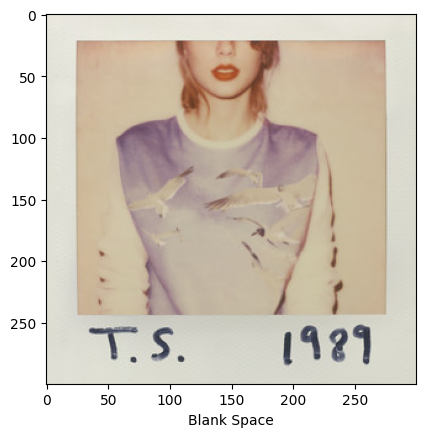

In [125]:
image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
#plt.gca().set_axis_off()
plt.show()


In [126]:
#Criando A FUNÇÃO
import matplotlib.pyplot as plt
from skimage import io

def visualize_songs(name,url):

    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False) # TIRA OS EIXOS
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
        #plt.axis('off')
    plt.show()


In [129]:
playlist_id = recomendadas.select('id').collect()

name = []
url = []
for i in playlist_id:
    track = sp.track(i[0])
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])

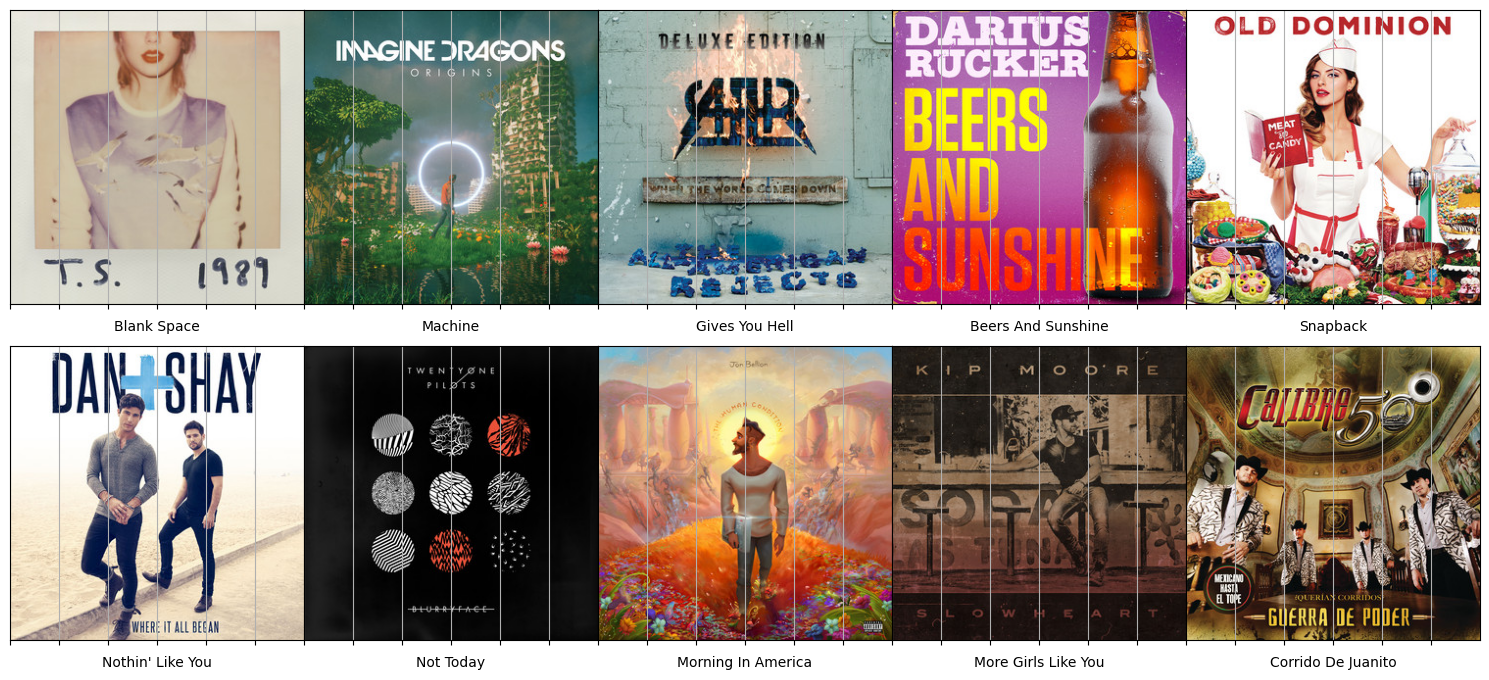

In [130]:
visualize_songs(name,url)

In [137]:
#Calcula músicas recomendadas
def  recomendador(nome_musica):

  if  projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).count() ==0:
      raise Exception('Não há essa música!!!')

  cluster = projection_kmeans\
                  .filter(projection_kmeans.artists_song == nome_musica)\
                  .select('cluster_pca')\
                  .collect()[0][0]

  musicas_recomendadas = projection_kmeans\
                          .filter(projection_kmeans.cluster_pca == cluster)\
                          .select(['artists_song','id','pca_features'])



  componentes_musica = musicas_recomendadas\
                          .filter(musicas_recomendadas.artists_song == nome_musica)\
                          .select(['pca_features'])\
                          .collect()[0][0]

  def calcula_distance(value):
    return euclidean(componentes_musica,value)


  udf_calcula_distance =f.udf(calcula_distance,FloatType())


  musicas_recomendadas_dist = musicas_recomendadas\
                                .withColumn('Dist',udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist\
                  .sort('Dist')\
                  .take(10))\
                  .select(['artists_song','id','Dist'])

  #recomendadas.select(recomendadas.artists_song.alias('Playlist')).show(truncate=False)

  playlist_track = []

  #Pegando o id das musicas recomendadas
  playlist_id = recomendadas.select('id').collect()

  name = []
  url = []
  #Salvando o nome e a url de cada musica da playlist
  for i in playlist_id:
      track = sp.track(i[0])
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

  #Plotando as capas
  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False) # TIRA OS EIXOS
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
      #plt.axis('off')
  plt.show()


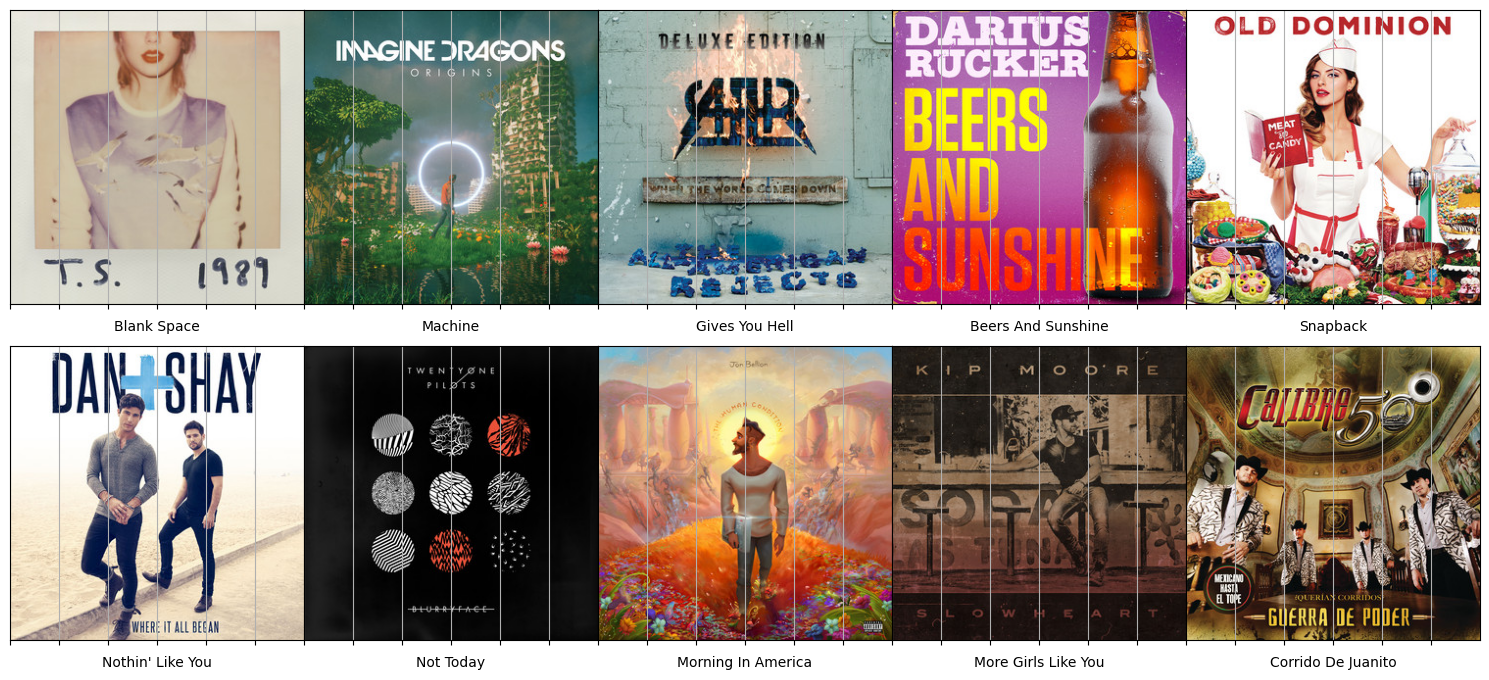

In [138]:
recomendador('Taylor Swift - Blank Space')